# not working

In [24]:
''' tk_image_slideshow3.py
create a Tkinter image repeating slide show
tested with Python27/33  by  vegaseat  03dec2013
'''
from itertools import cycle
try:
    # Python2
    import Tkinter as tk
except ImportError:
    # Python3
    import tkinter as tk
class App(tk.Tk):
    '''Tk window/label adjusts to size of image'''
    def __init__(self, image_files, x, y, delay):
        # the root will be self
        tk.Tk.__init__(self)
        # set x, y position only
        self.geometry('+{}+{}'.format(x, y))
        self.delay = delay
        # allows repeat cycling through the pictures
        # store as (img_object, img_name) tuple
        self.pictures = cycle((tk.PhotoImage(file=image), image)
                              for image in image_files)
        self.picture_display = tk.Label(self)
        self.picture_display.pack()
    def show_slides(self):
        '''cycle through the images and show them'''
        # next works with Python26 or higher
        img_object, img_name = next(self.pictures)
        self.picture_display.config(image=img_object)
        # shows the image filename, but could be expanded
        # to show an associated description of the image
        self.title(img_name)
        self.after(self.delay, self.show_slides)
    def run(self):
        self.mainloop()
# set milliseconds time between slides
delay = 3500
# get a series of gif images you have in the working folder
# or use full path, or set directory to where the images are
image_files = [
'data/gif/output_1.jpg',
'data/gif/output_2.jpg',
'data/gif/output_3.jpg',
'data/gif/output_4.jpg'
]
# upper left corner coordinates of app window
x = 100
y = 50
app = App(image_files, x, y, delay)
app.show_slides()
app.run()

TclError: couldn't recognize data in image file "data/gif/output_1.jpg"

# working text scrollbar

In [26]:
import tkinter as tk

root=tk.Tk()

vscrollbar = tk.Scrollbar(root)

c= tk.Canvas(root,background = "#D2D2D2",yscrollcommand=vscrollbar.set)

vscrollbar.config(command=c.yview)
vscrollbar.pack(side=tk.LEFT, fill=tk.Y) 

f=tk.Frame(c) #Create the frame which will hold the widgets

c.pack(side="left", fill="both", expand=True)

#Updated the window creation
c.create_window(0,0,window=f, anchor='nw')

#Added more content here to activate the scroll
for i in range(100):
    tk.Label(f,wraplength=350 ,text=r"Det er en kendsgerning, at man bliver distraheret af læsbart indhold på en side, når man betragter dens websider, som stadig er på udviklingsstadiet. Der har været et utal af websider, som stadig er på udviklingsstadiet. Der har været et utal af variationer, som er opstået enten på grund af fejl og andre gange med vilje (som blandt andet et resultat af humor).").pack()
    tk.Button(f,text="anytext").pack()

#Removed the frame packing
#f.pack()

#Updated the screen before calculating the scrollregion
root.update()
c.config(scrollregion=c.bbox("all"))

root.mainloop()

# working scrollbar Canvas

In [28]:
from tkinter import *


class ScrollableFrame(Frame):
    def __init__(self, parent, *args, **kw):
        '''
        Constructor
        '''

        Frame.__init__(self, parent, *args, **kw)

        # create a vertical scrollbar
        vscrollbar = Scrollbar(self, orient = VERTICAL)
        vscrollbar.pack(fill = Y, side = RIGHT, expand = FALSE)

        # create a horizontal scrollbar
        hscrollbar = Scrollbar(self, orient = HORIZONTAL)
        hscrollbar.pack(fill = X, side = BOTTOM, expand = FALSE)

        #Create a canvas object and associate the scrollbars with it
        self.canvas = Canvas(self, bd = 0, highlightthickness = 0, yscrollcommand = vscrollbar.set, xscrollcommand = hscrollbar.set)
        self.canvas.pack(side = LEFT, fill = BOTH, expand = TRUE)

        #Associate scrollbars with canvas view
        vscrollbar.config(command = self.canvas.yview)
        hscrollbar.config(command = self.canvas.xview)


        # set the view to 0,0 at initialization

        self.canvas.xview_moveto(0)
        self.canvas.yview_moveto(0)

        # create an interior frame to be created inside the canvas

        self.interior = interior = Frame(self.canvas)
        interior_id = self.canvas.create_window(0, 0, window=interior,
                anchor=NW)

        # track changes to the canvas and frame width and sync them,
        # also updating the scrollbar

        def _configure_interior(event):
            # update the scrollbars to match the size of the inner frame
            size = (interior.winfo_reqwidth(), interior.winfo_reqheight())
            self.canvas.config(scrollregion='0 0 %s %s' % size)
            if interior.winfo_reqwidth() != self.canvas.winfo_width():
                # update the canvas's width to fit the inner frame
                self.canvas.config(width = interior.winfo_reqwidth())
        interior.bind('<Configure>', _configure_interior)


class my_gui(Frame):

    def __init__(self):
        # main tk object
        self.root = Tk()

        # init Frame
        Frame.__init__(self, self.root)

        # create frame (gray window)

        self.frame = ScrollableFrame(self.root)
        self.frame.pack(fill=BOTH, expand=YES)


        #self.__add_scroll_bars()

        #self.__create_canvas()

        self.__add_plot()

    def __add_plot(self):
        # create a rectangle
        self.frame.canvas.create_polygon(10, 10, 10, 150, 200, 150, 200, 10,  fill="gray", outline="black")

    def mainLoop(self):
        # This function starts an endlos running thread through the gui
        self.root.mainloop()

    def __quit(self):
        # close everything
        self.root.quit()


# init gui
my_gui = my_gui()
# execute gui
my_gui.mainLoop()

# not working text scrollbar feeded with images

In [23]:
from tkinter import *
#import ttk
from PIL import *
from PIL import Image
import os
root = Tk();

text = Text(root)
text.grid(row=0, column=0)
text.grid_propagate(False)


class ImageLabel:
    def __init__(self, master, img_file):        
        label = Label(master)
        label.img = PhotoImage(file=img_file)
        label.config(image=label.img)
        label.image_create(side="bottom")

## Adding images to text widget
width = 300
src = "c:/Users/E411208/Documents/Python Scripts/data/gif/"
my_item_id = 'output'
count = 1;
file_name = str(my_item_id)+'_'+str(count)+'.jpg';
full_file_name = os.path.join(src, file_name)
print(full_file_name)
print(os.path.isfile(full_file_name))

imagelabels = []
while os.path.isfile(full_file_name):
    
    im = Image.open(full_file_name)
    height = width*im.size[1]/im.size[0]
    im.thumbnail((width, height), Image.ANTIALIAS)
    im.save(str(count),'gif')
    imagelabels.append(ImageLabel(text, str(count)))
    count = count+1;
    file_name = str(my_item_id)+'_'+str(count)+'.jpg';
    full_file_name = os.path.join(src, file_name)
    print(count)

## Adding scrollbar
scrollbar = Scrollbar(root, orient=VERTICAL, command=text.yview)
scrollbar.grid(row=0,column=1, sticky='ns')
text.config(yscrollcommand=scrollbar.set)

root.mainloop()

c:/Users/E411208/Documents/Python Scripts/data/gif/output_1.jpg
True


TclError: image "pyimage6" doesn't exist

# scrollbar in a frame

In [31]:
from tkinter import *

def data():
    for i in range(50):
       Label(frame,text=i).grid(row=i,column=0)
       Label(frame,text="my text"+str(i)).grid(row=i,column=1)
       Label(frame,text="..........").grid(row=i,column=2)

def myfunction(event):
    canvas.configure(scrollregion=canvas.bbox("all"),width=200,height=200)

root=Tk()
sizex = 800
sizey = 600
posx  = 100
posy  = 100
root.wm_geometry("%dx%d+%d+%d" % (sizex, sizey, posx, posy))

myframe=Frame(root,relief=GROOVE,width=50,height=100,bd=1)
myframe.place(x=10,y=10)

canvas=Canvas(myframe)
frame=Frame(canvas)
myscrollbar=Scrollbar(myframe,orient="vertical",command=canvas.yview)
canvas.configure(yscrollcommand=myscrollbar.set)

myscrollbar.pack(side="right",fill="y")
canvas.pack(side="left")
canvas.create_window((0,0),window=frame,anchor='nw')
frame.bind("<Configure>",myfunction)
data()
root.mainloop()

# scrollbar with buttons

In [34]:
from tkinter import *   # from x import * is bad practice
#from ttk import *

# http://tkinter.unpythonic.net/wiki/VerticalScrolledFrame

class VerticalScrolledFrame(Frame):
    """A pure Tkinter scrollable frame that actually works!
    * Use the 'interior' attribute to place widgets inside the scrollable frame
    * Construct and pack/place/grid normally
    * This frame only allows vertical scrolling

    """
    def __init__(self, parent, *args, **kw):
        Frame.__init__(self, parent, *args, **kw)            

        # create a canvas object and a vertical scrollbar for scrolling it
        vscrollbar = Scrollbar(self, orient=VERTICAL)
        vscrollbar.pack(fill=Y, side=RIGHT, expand=FALSE)
        canvas = Canvas(self, bd=0, highlightthickness=0,
                        yscrollcommand=vscrollbar.set)
        canvas.pack(side=LEFT, fill=BOTH, expand=TRUE)
        vscrollbar.config(command=canvas.yview)

        # reset the view
        canvas.xview_moveto(0)
        canvas.yview_moveto(0)

        # create a frame inside the canvas which will be scrolled with it
        self.interior = interior = Frame(canvas)
        interior_id = canvas.create_window(0, 0, window=interior,
                                           anchor=NW)

        # track changes to the canvas and frame width and sync them,
        # also updating the scrollbar
        def _configure_interior(event):
            # update the scrollbars to match the size of the inner frame
            size = (interior.winfo_reqwidth(), interior.winfo_reqheight())
            canvas.config(scrollregion="0 0 %s %s" % size)
            if interior.winfo_reqwidth() != canvas.winfo_width():
                # update the canvas's width to fit the inner frame
                canvas.config(width=interior.winfo_reqwidth())
        interior.bind('<Configure>', _configure_interior)

        def _configure_canvas(event):
            if interior.winfo_reqwidth() != canvas.winfo_width():
                # update the inner frame's width to fill the canvas
                canvas.itemconfigure(interior_id, width=canvas.winfo_width())
        canvas.bind('<Configure>', _configure_canvas)


if __name__ == "__main__":

    class SampleApp(Tk):
        def __init__(self, *args, **kwargs):
            root = Tk.__init__(self, *args, **kwargs)


            self.frame = VerticalScrolledFrame(root)
            self.frame.pack()
            self.label = Label(text="Shrink the window to activate the scrollbar.")
            self.label.pack()
            buttons = []
            for i in range(10):
                buttons.append(Button(self.frame.interior, text="Button " + str(i)))
                buttons[-1].pack()

    app = SampleApp()
    app.mainloop()

# scrollbar  -  frame-embedded-in-canvas solution

In [38]:
import tkinter as tk

def populate(frame):
    '''Put in some fake data'''
    for row in range(100):
        tk.Label(frame, text="%s" % row, width=3, borderwidth="1", 
                 relief="solid").grid(row=row, column=0)
        t="this is the second column for row %s" %row
        tk.Label(frame, text=t).grid(row=row, column=1)

def onFrameConfigure(canvas):
    '''Reset the scroll region to encompass the inner frame'''
    canvas.configure(scrollregion=canvas.bbox("all"))

root = tk.Tk()
canvas = tk.Canvas(root, borderwidth=0, background="#ffffff")
frame = tk.Frame(canvas, background="#ffffff")
vsb = tk.Scrollbar(root, orient="vertical", command=canvas.yview)
canvas.configure(yscrollcommand=vsb.set)

vsb.pack(side="right", fill="y")
canvas.pack(side="left", fill="both", expand=True)
canvas.create_window((4,4), window=frame, anchor="nw")

frame.bind("<Configure>", lambda event, canvas=canvas: onFrameConfigure(canvas))

populate(frame)

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\E411208\AppData\Local\Continuum\Anaconda3\lib\tkinter\__init__.py", line 1550, in __call__
    return self.func(*args)
  File "<ipython-input-37-f07d0b50ade5>", line 7, in on_configure
    canvas.configure(scrollregion=canvas.bbox('all'))
  File "C:\Users\E411208\AppData\Local\Continuum\Anaconda3\lib\tkinter\__init__.py", line 2279, in bbox
    self.tk.call((self._w, 'bbox') + args)) or None
_tkinter.TclError: invalid command name ".106419144"
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\E411208\AppData\Local\Continuum\Anaconda3\lib\tkinter\__init__.py", line 1550, in __call__
    return self.func(*args)
  File "<ipython-input-37-f07d0b50ade5>", line 7, in on_configure
    canvas.configure(scrollregion=canvas.bbox('all'))
  File "C:\Users\E411208\AppData\Local\Continuum\Anaconda3\lib\tkinter\__init__.py", line 2279, in bbox
    self.tk.call((self._w, 'bbox') + args)) o

In [65]:
import tkinter as tk


def on_configure(event):
    # update scrollregion after starting 'mainloop'
    # when all widgets are in canvas
    canvas.configure(scrollregion=canvas.bbox('all'))


root = tk.Tk()

# --- create canvas with scrollbar ---

canvas = tk.Canvas(root)
canvas.pack(side=tk.LEFT)

scrollbar = tk.Scrollbar(root, command=canvas.yview)
scrollbar.pack(side=tk.LEFT, fill='y')

canvas.configure(yscrollcommand = scrollbar.set)

# update scrollregion after starting 'mainloop'
# when all widgets are in canvas
canvas.bind('<Configure>', on_configure)

# --- put frame in canvas ---

frame = tk.Frame(canvas)
canvas.create_window((0,0), window=frame, anchor='nw')

# --- add widgets in frame ---

l = tk.Label(frame, text="Hello", font="-size 50")
l.pack()

l = tk.Label(frame, text="World", font="-size 50")
l.pack()

l = tk.Label(frame, text="Test text 1\nTest text 2\nTest text 3\nTest text 4\nTest text 5\nTest text 6\nTest text 7\nTest text 8\nTest text 9", font="-size 20")
l.pack()

root.mainloop()

In [ ]:

photo = ImageTk.PhotoImage(image)
label = tk.Label(root, image=photo)
label.image = photo
label.grid(row=2, column=0)

In [52]:
import tkinter as tk
from PIL import Image, ImageTk

class View(tk.Frame):
    def __init__(self, *args, **kwargs):
        tk.Frame.__init__(self, *args, **kwargs)
        image = Image.open("c:/Users/E411208/Documents/Python Scripts/data/gif/output_1.jpg")
        self.image = ImageTk.PhotoImage(image)
        b = tk.Button(self, text="Hello, world", compound="left")
        b.pack(side="top")

if __name__ == "__main__":
    root = tk.Tk()
    view = View(root)
    view.pack(side="top", fill="both", expand=True)
    root.mainloop()

TclError: can't invoke "frame" command: application has been destroyed

# Not working - Show image when click
## http://stackoverflow.com/questions/37517936/matplotlib-scatterplot-open-image-corresponding-to-point-which-i-click

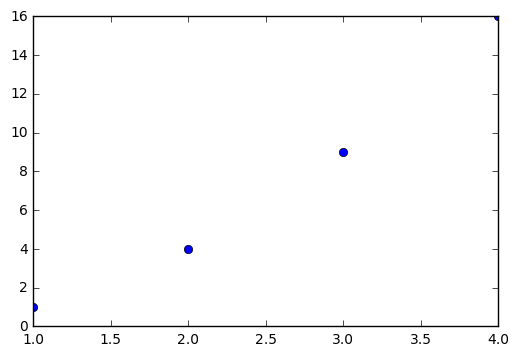

In [57]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

x=[1,2,3,4]
y=[1,4,9,16]

fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(x, y, 'o')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print("I clicked at x={0:5.2f}, y={1:5.2f}".format(ix,iy))

    # Calculate, based on the axis extent, a reasonable distance 
    # from the actual point in which the click has to occur (in this case 5%)
    ax = plt.gca()
    dx = 0.05 * (ax.get_xlim()[1] - ax.get_xlim()[0])
    dy = 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0])

    # Check for every point if the click was close enough:
    for i in range(len(x)):
        if(x[i] > ix-dx and x[i] < ix+dx and y[i] > iy-dy and y[i] < iy+dy):
            print("You clicked close enough!")

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

# Plotly

In [63]:
import plotly 
plotly.tools.set_credentials_file(username='trojana', api_key='vdQrSihcCaul3cXTD2sK')

In [69]:
import plotly.plotly as py
import plotly.graph_objs as go



country = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
voting_pop = [40, 45.7, 52, 53.6, 54.1, 54.2, 54.5, 54.7, 55.1, 56.6]
reg_voters = [49.1, 42, 52.7, 84.3, 51.7, 61.1, 55.3, 64.2, 91.1, 58.9]

trace0 = go.Scatter(
    x=voting_pop,
    y=country,
    mode='markers',
    name='Percent of estimated voting age population',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=reg_voters,
    y=country,
    mode='markers',
    name='Percent of estimated registered voters',
    marker=dict(
        color='rgba(204, 204, 204, 0.95)',
        line=dict(
            color='rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
data = [trace0, trace1]
layout = go.Layout(
    title="Votes cast for ten lowest voting age population in OECD countries",
    xaxis=dict(
        showgrid=True,
        showline=False,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        autotick=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='rgb(254, 247, 234)',
    plot_bgcolor='rgb(254, 247, 234)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='lowest-oecd-votes-cast')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~trojana/0 or inside your plot.ly account where it is named 'lowest-oecd-votes-cast'


In [72]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly.plotly as py
import cufflinks as cf
import pandas as pd

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

df = pd.read_csv('http://www.stat.ubc.ca/~jenny/notOcto/STAT545A/examples/gapminder/data/gapminderDataFiveYear.txt', sep='\t')
df2007 = df[df.year==2007]
df1952 = df[df.year==1952]
df.head(2)

df2007.iplot(kind='scatter', mode='markers', x='gdpPercap', y='lifeExp', filename='cufflinks-simple-scatter')

In [75]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Bar(
        x=['Bob Dylan', 'The Beatles', 'David Bowie', 'Randy Newman', 'The Rolling Stones', 'Madonna', 'Frank Sinatra', 'The Beach Boys', 'Marvin Gaye', 'Prince', 'The Kinks', 'Elvis Presley', 'Tom Waits', 'U2', 'The Clash', 'Johnny Cash', 'Kate Bush', 'The Supremes', 'The Smiths', 'Al Green', 'Pulp', 'Chuck Berry', 'Elvis Costello and the Attractions', 'Neil Young', 'Stevie Wonder', 'Ray Charles', 'The Pogues', 'Grace Jones', 'Bill Withers', 'The Who', 'Paul Simon', 'Roy Orbison', 'Arctic Monkeys', 'Bruce Springsteen', 'The Police', 'Rod Stewart', 'Steve Earle'],
        y=[24, 19, 9, 8, 8, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        name='Number of songs per artist',
        marker=Marker(
            color='#2ca02c'
        )
    )
]

layout = go.Layout(
    title="Number of songs listed in the Guardian's<br><em>Top 1,000 Songs to Hear Before You Die</em> per artist with 4 or more songs",
    font=dict(
        family='Georgia, serif',
        color='#635F5D'
    ),
    plot_bgcolor='#EFECEA'
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig)

NameError: name 'Marker' is not defined